In [27]:
import os
from md_diffusion import *
import matplotlib.colorbar as cbar
import matplotlib.pyplot as plt
import numpy as np
import yaml

from msd_fft import *

### Read log files

In [3]:
data_dir = '/home/kutay/Documents/git/Nanocar/diffusion/docs/data'
mol_name = 'DC_Cu110'

In [14]:
ALL_DATA = {}
for sim_type in ['temperature-flexible', 'temperature-rigid']:
    DATA = {}
    simdir = '%s/%s/%s' % (data_dir, sim_type, mol_name)
    for temperature in os.listdir(simdir):
        temp_simdir = os.path.join(simdir, temperature)
        DATA[temperature] = read_lammps_out(temp_simdir, var=['temp', 'emol', 'epair'], t_skip=0, log='log.%s' % mol_name)
    ALL_DATA[sim_type.split('-')[1]] = DATA

### Plot temperature vs time

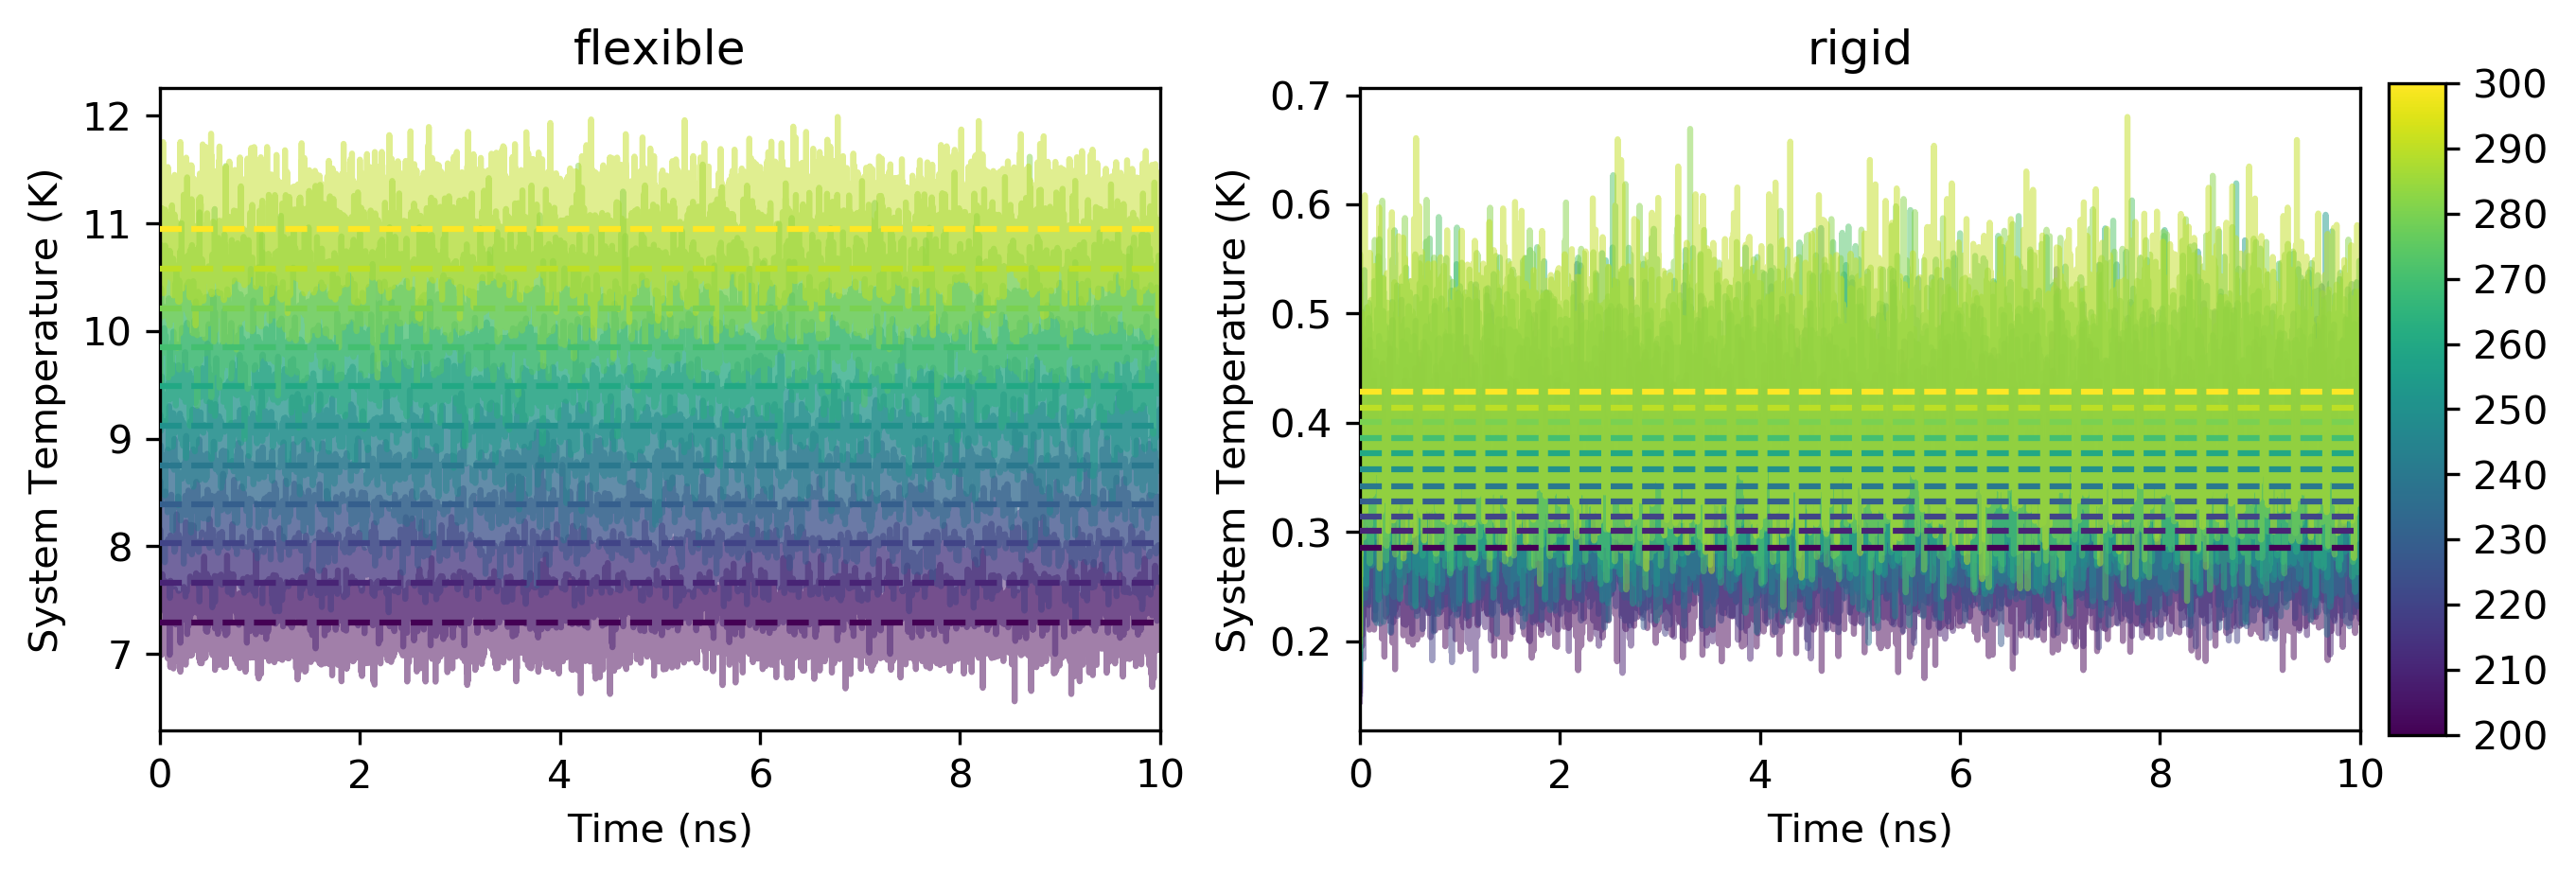

In [55]:
fig = plt.figure(figsize=(10, 3), dpi=300)

runs = [str(i) for i in range(1, 21)]
cmap = plt.get_cmap('viridis')
for idx, sim_type in enumerate(ALL_DATA, start=1):
    ax = fig.add_subplot(1, 2, idx)
    temperatures = sorted(list(ALL_DATA[sim_type].keys()))
    for i, t in enumerate(temperatures):
        # Average temp for each run
        time = np.average([ALL_DATA[sim_type][t][run]['time'] for run in runs], axis=0)
        temp = np.average([ALL_DATA[sim_type][t][run]['temp'] for run in runs], axis=0)
        ax.plot(time, temp, alpha=0.5, c=cmap(i / len(temperatures)))
        yavg = np.average(temp)
        ax.plot([0, 10], [yavg, yavg], '--', c=cmap(i / 10), zorder=100)
    ax.set_xlim(0, 10)
    ax.set_title(sim_type)
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('System Temperature (K)')
cax = fig.add_axes([0.91, 0.12, 0.02, 0.765])
cb1 = cbar.ColorbarBase(cax, cmap=cmap, orientation='vertical', ticks=np.arange(0, 1 + 0.1, 0.1))
cb1.set_ticklabels(temperatures)

### Plot molecular energy

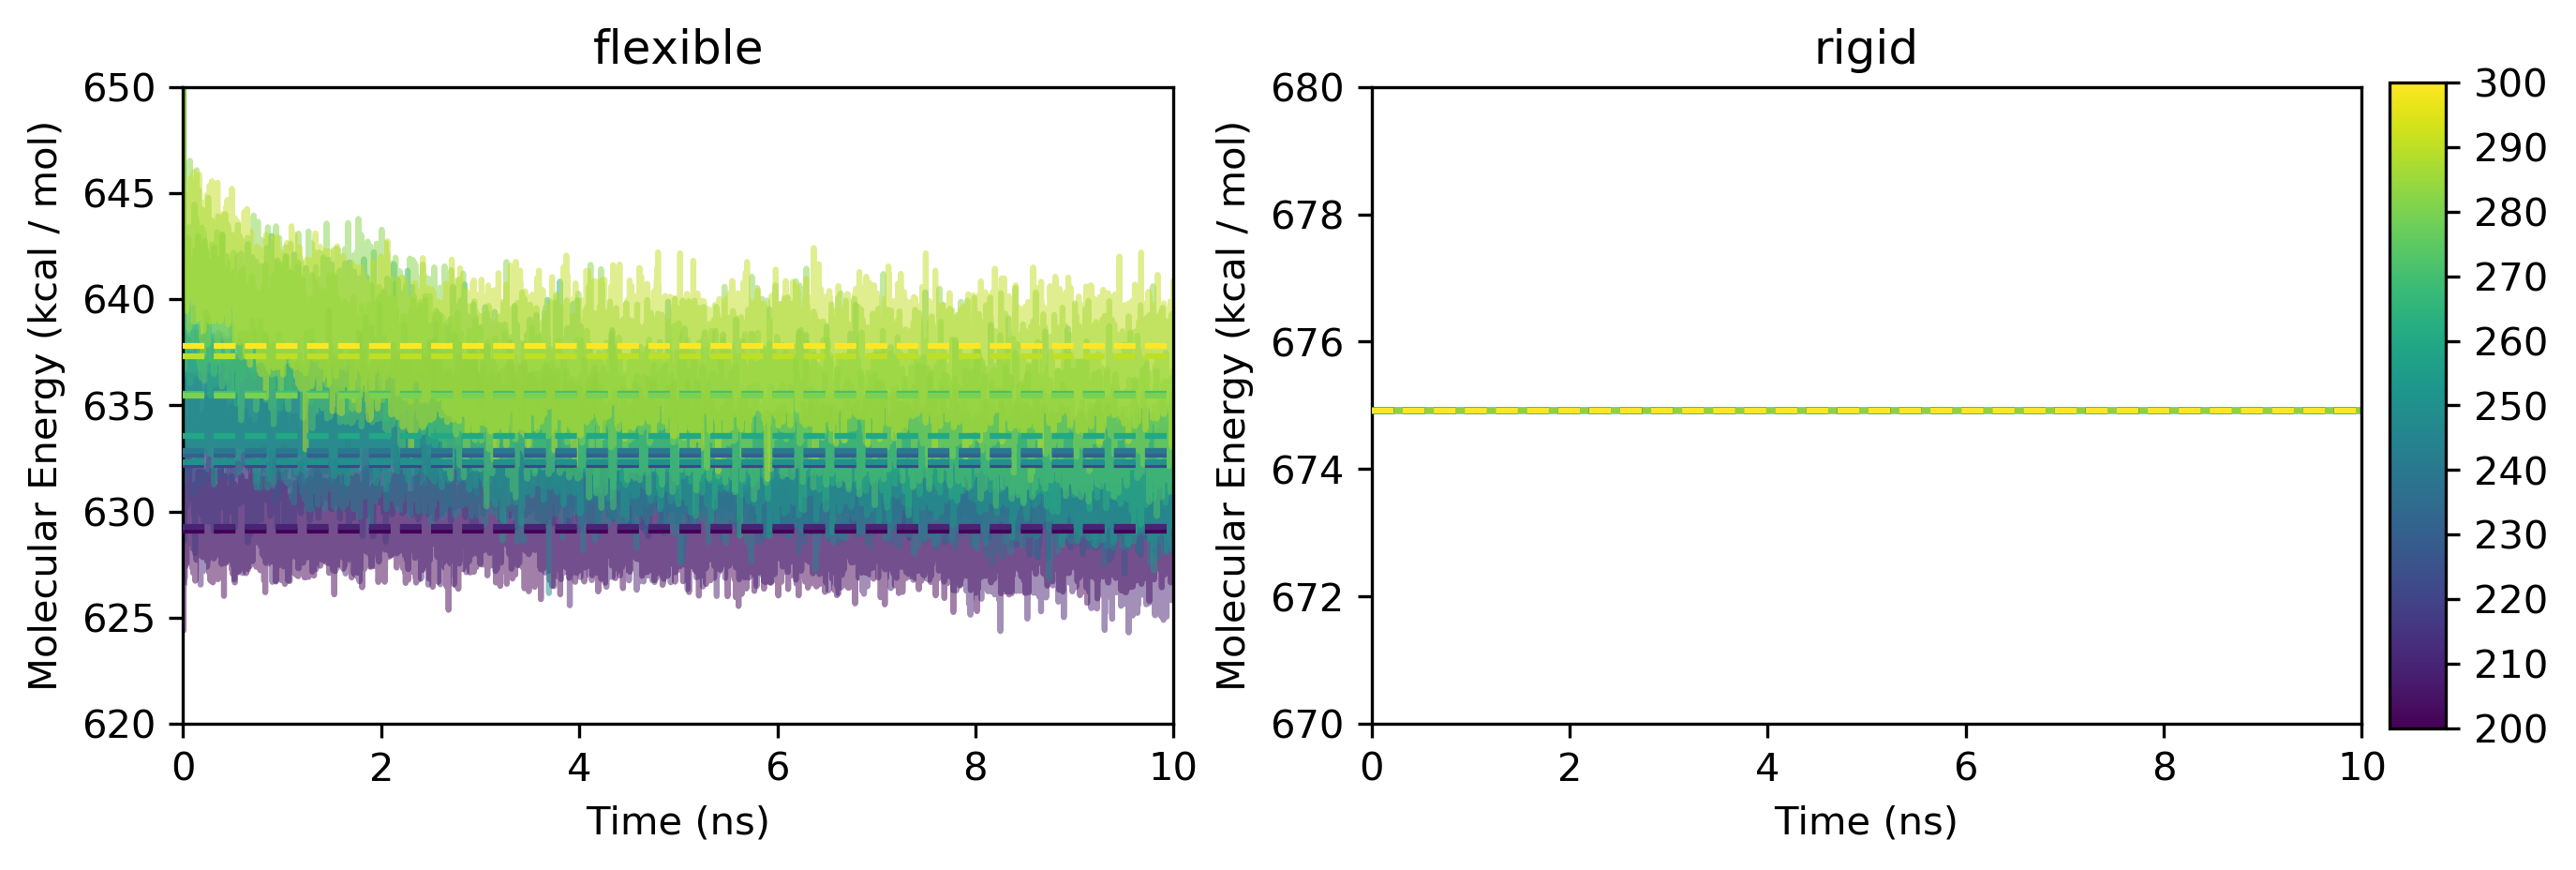

In [57]:
fig = plt.figure(figsize=(10, 3), dpi=300)

runs = [str(i) for i in range(1, 21)]
cmap = plt.get_cmap('viridis')
ylims = [(620, 650), (670, 680)]
for idx, sim_type in enumerate(ALL_DATA, start=1):
    ax = fig.add_subplot(1, 2, idx)
    temperatures = sorted(list(ALL_DATA[sim_type].keys()))
    for i, t in enumerate(temperatures):
        # Average temp for each run
        time = np.average([ALL_DATA[sim_type][t][run]['time'] for run in runs], axis=0)
        emol = np.average([ALL_DATA[sim_type][t][run]['emol'] for run in runs], axis=0)
        ax.plot(time, emol, alpha=0.5, c=cmap(i / len(temperatures)))
        yavg = np.average(emol)
        ax.plot([0, 10], [yavg, yavg], '--', c=cmap(i / 10), zorder=100)
    ax.set_xlim(0, 10)
    ax.set_ylim(ylims[idx - 1])
    ax.set_title(sim_type)
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('Molecular Energy (kcal / mol)')
cax = fig.add_axes([0.91, 0.12, 0.02, 0.765])
cb1 = cbar.ColorbarBase(cax, cmap=cmap, orientation='vertical', ticks=np.arange(0, 1 + 0.1, 0.1))
cb1.set_ticklabels(temperatures)

### Pairwise Energy

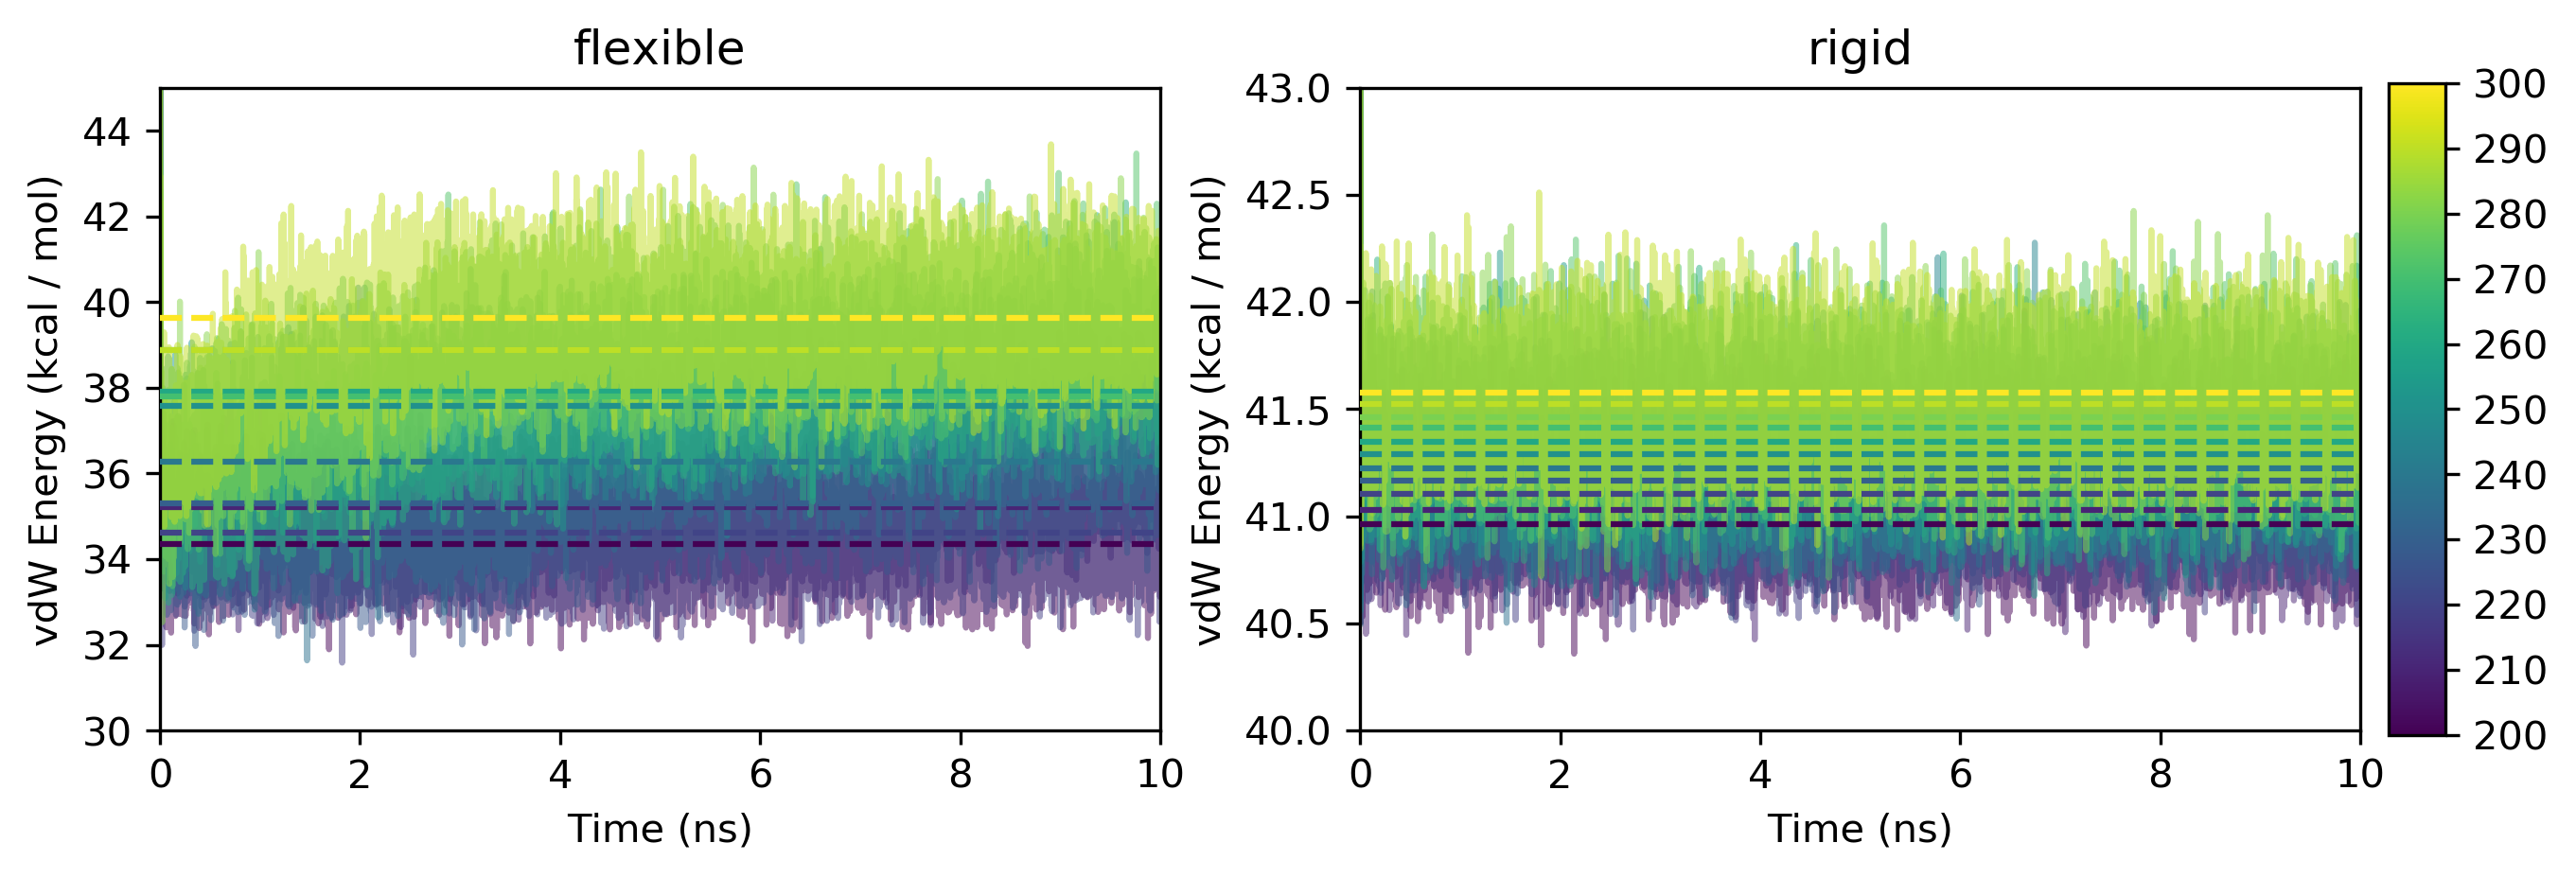

In [63]:
fig = plt.figure(figsize=(10, 3), dpi=300)

runs = [str(i) for i in range(1, 21)]
cmap = plt.get_cmap('viridis')
ylims = [(30, 45), (40, 43)]
for idx, sim_type in enumerate(ALL_DATA, start=1):
    ax = fig.add_subplot(1, 2, idx)
    temperatures = sorted(list(ALL_DATA[sim_type].keys()))
    for i, t in enumerate(temperatures):
        # Average temp for each run
        time = np.average([ALL_DATA[sim_type][t][run]['time'] for run in runs], axis=0)
        epair = np.average([ALL_DATA[sim_type][t][run]['epair'] for run in runs], axis=0)
        ax.plot(time, epair, alpha=0.5, c=cmap(i / len(temperatures)))
        yavg = np.average(epair)
        ax.plot([0, 10], [yavg, yavg], '--', c=cmap(i / 10), zorder=100)
    ax.set_xlim(0, 10)
    ax.set_ylim(ylims[idx - 1])
    ax.set_title(sim_type)
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('vdW Energy (kcal / mol)')
cax = fig.add_axes([0.91, 0.12, 0.02, 0.765])
cb1 = cbar.ColorbarBase(cax, cmap=cmap, orientation='vertical', ticks=np.arange(0, 1 + 0.1, 0.1))
cb1.set_ticklabels(temperatures)